# Part II - Ford GoBike System Data
## by Jerry Oscar

## Investigation Overview


> In this analysis, we aim to delve into the bikeshare data to uncover important correlations and patterns. Our focus will be to determine if there exists a connection between a rider's age and their riding duration, to compare the behaviors of subscribers and customers, and to examine the impact of gender on these variables.

> The visuals that follow will present the relationships between age and gender, age and ride length, as well as contrasting the age and ride durations of subscribers and customers.


## Dataset Overview and Executive Summary

> This dataset provides insights into single trips taken using a bike-sharing system that spans across the larger San Francisco Bay area. According to the filename, the data is collected from the year 2019 and offers a glimpse into various aspects of bike rentals. These include the location and length of each rental, along with some customer-specific information like the year of birth, type of user, and gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


## Data Preperations

In [3]:
# Drop rows with NaN values
fordgobike_df = fordgobike_df.dropna()

# Replace inf values with NaN, then drop those rows
fordgobike_df.replace([np.inf, -np.inf], np.nan, inplace=True)
fordgobike_df.dropna(inplace=True)

# Convert certain columns to integer data type
fordgobike_df = fordgobike_df.astype({'member_birth_year': 'int32', 'start_station_id': 'int32', 'end_station_id': 'int32'})

# Define the expected order of values for certain ordinal variables
ordered_categories = {'user_type': ['Subscriber', 'Customer'],
                      'member_gender': ['Male', 'Female', 'Other'],
                      'bike_share_for_all_trip': ['Yes', 'No']}

# Looping through the dictionary to convert data types in the DataFrame
for variable in ordered_categories:
    ordered_variable = pd.api.types.CategoricalDtype(ordered=True, categories=ordered_categories[variable])
    fordgobike_df[variable] = fordgobike_df[variable].astype(ordered_variable)

# Convert 'start_time' to datetime format
fordgobike_df['start_time'] = pd.to_datetime(fordgobike_df['start_time'])

# Extract the day of the week from the 'start_time' column
fordgobike_df['start_day_of_week'] = fordgobike_df['start_time'].dt.day_name()

# Order the days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fordgobike_df['start_day_of_week'] = pd.Categorical(fordgobike_df['start_day_of_week'], categories=days_of_week, ordered=True)

# Calculate the age of riders
fordgobike_df['rider_age'] = 2019 - fordgobike_df['member_birth_year']

## Histogram of what age group constitutes the majority of riders
> Descriptive Comment: This code generates a histogram visualizing the age distribution of riders. By calculating the ages and categorizing them into one-year bins, it becomes evident which age group is the most prevalent among our riders. The x-axis represents the age of the riders, and the y-axis shows the number of riders in each age group.

Text(0.5, 1.0, 'Count of Riders by Age')

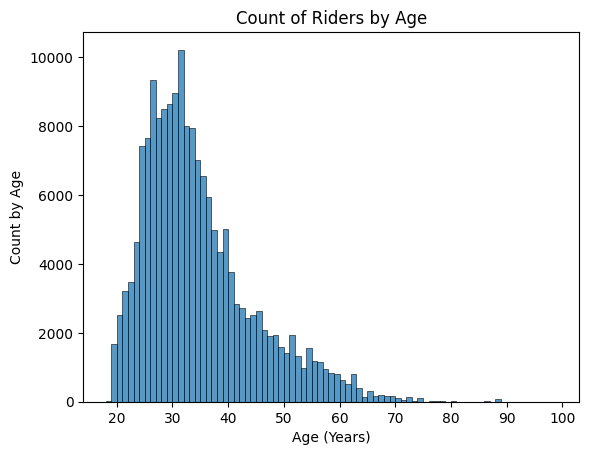

In [4]:
# Calculate the age of each rider based on their birth year
fordgobike_df['age'] = 2019 - fordgobike_df['member_birth_year']

# Define the bins for the age groups (from 18 to 100, with an interval of 1 year)
bins = np.arange(18, 100, 1)

# Create a histogram using seaborn's histplot function, setting the data source and the column for the x-axis
sns.histplot(data=fordgobike_df, x='age', bins=bins)

# Set the label for the x-axis
plt.xlabel('Age (Years)')

# Set the label for the y-axis
plt.ylabel('Count by Age')

# Set the title for the plot
plt.title('Count of Riders by Age')

## Conclusion
> Predominantly, our riders fall within the age group of 24 to 40. This is understandable given that biking is a physical activity, often favored by the younger demographic due to its active nature. As people age, they may lean towards alternative modes of transportation that require less physical exertion.

## Clustered bar chart Comparing Average Trip Duration Across User Types and Genders 

> Descriptive Comment: The clustered bar chart visually represents the average trip duration across various user types and genders, allowing for an immediate comparison of biking habits among different demographic groups.

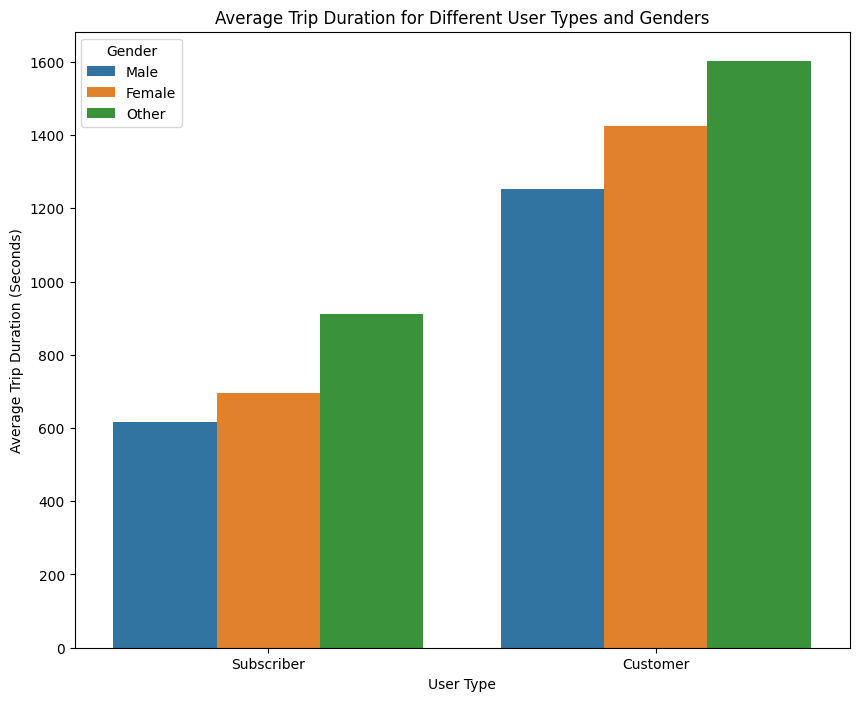

In [5]:
# Calculate the average trip duration for each combination of user type and gender
average_durations = fordgobike_df.groupby(['user_type', 'member_gender'])['duration_sec'].mean().reset_index()

# Create a clustered bar chart
plt.figure(figsize=[10, 8])
sns.barplot(data = average_durations, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (Seconds)')
plt.title('Average Trip Duration for Different User Types and Genders')
plt.legend(title = 'Gender')
plt.show()

## Conclusion
> The bar chart reveals that 'Customer' users, regardless of gender, generally have longer bike trips than 'Subscriber' users. Among all groups, the 'Other' gender category tends to have the longest average trip durations.

## Violin Chart provinding insights on variation in User Age and Trip Duration

> Descriptive Comment: The violin Chart visually explores the variations in user age and trip duration, considering factors like user type, gender, and bike sharing for the entire trip. The violin plots provide a detailed perspective on how these distinct factors interplay and affect rider behavior.

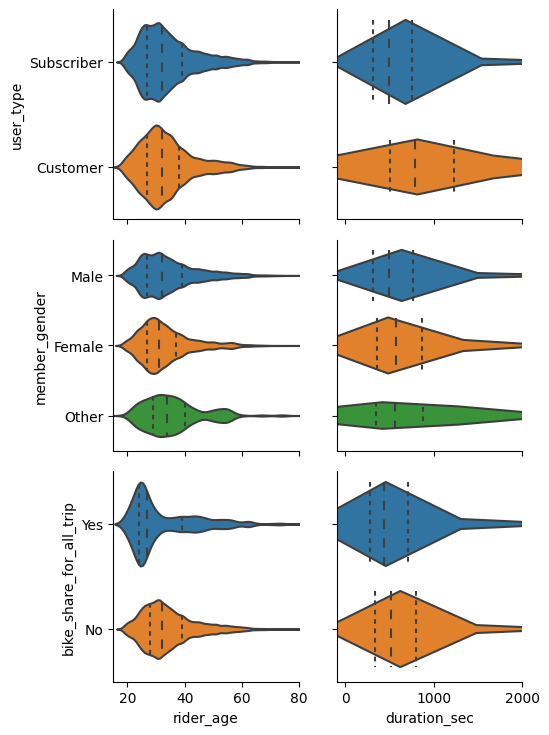

In [6]:
# Filter the DataFrame to only include riders with age less than or equal to 90
filtered_df = fordgobike_df[fordgobike_df['rider_age'] <= 90]

# Create a PairGrid object with 'user_type', 'member_gender', and 'bike_share_for_all_trip' as y_vars and 'rider_age' and 'duration_sec' as x_vars
grid = sns.PairGrid(data=filtered_df, x_vars=['rider_age', 'duration_sec'],
                y_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'])

# Map a violinplot onto each facet
grid.map(sns.violinplot, inner='quartile')

# Set the x-axis limits for 'rider_age' and 'duration_sec'
grid.axes[0,0].set_xlim(15, 80)
grid.axes[1,1].set_xlim(-100,2000)

# Display the plots
plt.show()

## Conclusion
> The plot matrix reveals variations in rider age and trip duration based on user type, gender, and bike-sharing behavior. Specifically, 'Subscriber' users are generally younger and have shorter trips, while 'Customer' users, especially those identifying as 'Other', are older and have longer trips.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
